First, download datasets (It will take a few minutes. You can comment out some of the files if you want a smaller dataset):

https://github.com/NeuroTechX/dl-eeg-playground/blob/master/brainDecode/2%20-%20Two-Classes%20Classification%20(BNCI)%20Colab.ipynb

In [ ]:
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S01T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S01E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S02T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S02E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S03T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S03E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S04T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S04E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S05T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S05E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S06T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S06E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S07T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S07E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S08T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S08E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S09T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S09E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S10T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S10E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S11T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S11E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S12T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S12E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S13T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S13E.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S14T.mat
!wget http://bnci-horizon-2020.eu/database/data-sets/002-2014/S14E.mat

--2023-11-09 18:14:45--  http://bnci-horizon-2020.eu/database/data-sets/002-2014/S01T.mat
Resolving bnci-horizon-2020.eu (bnci-horizon-2020.eu)... 91.227.205.222, 2a03:f80:ad15:91:227:205:222:1
Connecting to bnci-horizon-2020.eu (bnci-horizon-2020.eu)|91.227.205.222|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lampx.tugraz.at/~bci/database/002-2014/S01T.mat [following]
--2023-11-09 18:14:46--  https://lampx.tugraz.at/~bci/database/002-2014/S01T.mat
Resolving lampx.tugraz.at (lampx.tugraz.at)... 129.27.124.233
Connecting to lampx.tugraz.at (lampx.tugraz.at)|129.27.124.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39794870 (38M)
Saving to: ‘S01T.mat’

S01T.mat            100%[===================>]  37.95M  12.3MB/s    in 3.1s    

2023-11-09 18:14:50 (12.3 MB/s) - ‘S01T.mat’ saved [39794870/39794870]

--2023-11-09 18:14:50--  http://bnci-horizon-2020.eu/database/data-sets/002-2014/S01E.mat
Resolving bnci-horizon-202

Move files to a separate folder:

In [ ]:
!mkdir BBCIData
!mv *.mat BBCIData

mkdir: cannot create directory ‘BBCIData’: File exists


Install dependencies (braindecode & pytorch):

In [ ]:
!pip install braindecode==0.4.85 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.3 MB/s eta 0:00:00


In [ ]:
!pip3 install wheel==0.34.1

In [ ]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp310-cp310-linux_x86_64.whl
ERROR: Could not install requirement torch==0.3.0.post4 from http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp310-cp310-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp310-cp310-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp310-cp310-linux_x86_64.whl


Now, let's load data.

We read the file for the desired subject, and parse the data to extract:
- samplingRate
- trialLength
- X, a M x N x K matrix, which stands for trial x chan x samples
    - the actual values are 160 x 15 x 2560
- y, a M vector containing the labels {0,1}

ref: Dataset description: https://lampx.tugraz.at/~bci/database/002-2014/description.pdf

In [ ]:
import scipy.io as sio
import numpy as np
from os import listdir
from os.path import isfile, join

# prepare data containers
y = []
X = []

folder = "/content/BBCIData"

for f in listdir(folder):
    # read file
    d1T = sio.loadmat(folder + "/" + f)

    samplingRate = d1T['data'][0][0][0][0][3][0][0]
    trialLength = 7*samplingRate


    # run through all training runs
    for run in range(len(d1T['data'][0])):
        y.append(d1T['data'][0][run][0][0][2][0]) # labels
        timestamps = d1T['data'][0][run][0][0][1][0] # timestamps
        rawData = d1T['data'][0][run][0][0][0].transpose() # chan x data

        # parse out data based on timestamps
        for start in timestamps:
            end = start + trialLength
            X.append(rawData[:,start:end]) #15 x 2560

    del rawData
    del d1T

# arrange data into num7py arrays
# also torch expect float32 for samples
# and int64 for labels {0,1}
X = np.array(X).astype(np.float32)
y = (np.array(y).flatten()-1).astype(np.int64)
print(X.shape)
print(y.shape)

(2240, 15, 3584)
(2240,)


Load the models:

In [ ]:
from braindecode.datautil.signal_target import SignalAndTarget
from braindecode.models.shallow_fbcsp import ShallowFBCSPNet
from torch import nn
from braindecode.torch_ext.util import set_random_seeds
from torch import optim
import torch

idx = np.random.permutation(X.shape[0])

X = X[idx,:,:]
y = y[idx]

nb_train_trials = int(np.floor(7/8*X.shape[0]))


train_set = SignalAndTarget(X[:nb_train_trials], y=y[:nb_train_trials])
test_set = SignalAndTarget(X[nb_train_trials:], y=y[nb_train_trials:])

# Set if you want to use GPU
# You can also use torch.cuda.is_available() to determine if cuda is available on your machine.
cuda = torch.cuda.is_available()
set_random_seeds(seed=20180505, cuda=cuda)
n_classes = 2
in_chans = train_set.X.shape[1]
# final_conv_length = auto ensures we only get a single output in the time dimension
model = ShallowFBCSPNet(in_chans=in_chans, n_classes=n_classes,
                        input_time_length=train_set.X.shape[2],

                        n_filters_time=10,
                        filter_time_length=75,
                        n_filters_spat=5,
                        pool_time_length=60,
                        pool_time_stride=30,

                        #n_filters_time=10,
                        #filter_time_length=90,
                        #n_filters_spat=1,
                        #pool_time_length=45,
                        #pool_time_stride=15,

                        final_conv_length='auto'
                        ).create_network()
if cuda:
    model.cuda()

optimizer = optim.Adam(model.parameters())

Load optimizer. You can find hyperparameters in the link below.  
http://pytorch.org/docs/master/optim.html

Finally start training:

In [ ]:

from braindecode.torch_ext.util import np_to_var, var_to_np
from braindecode.datautil.iterators import get_balanced_batches
import torch.nn.functional as F
from numpy.random import RandomState
rng = RandomState(None)
#rng = RandomState((2017,6,30))

nb_epoch = 160
loss_rec = np.zeros((nb_epoch,2))
accuracy_rec = np.zeros((nb_epoch,2))


for i_epoch in range(nb_epoch):

    # get a set of balanced batches
    i_trials_in_batch = get_balanced_batches(len(train_set.X), rng, shuffle=True,
                                            batch_size=32)


    # Set model to training mode
    model.train()

    # go through all batches
    for i_trials in i_trials_in_batch:
        # Have to add empty fourth dimension to X
        batch_X = train_set.X[i_trials][:,:,:,None]
        batch_y = train_set.y[i_trials]
        net_in = np_to_var(batch_X)
        if cuda:
            net_in = net_in.cuda()
        net_target = np_to_var(batch_y)
        if cuda:
            net_target = net_target.cuda()
        # Remove gradients of last backward pass from all parameters
        optimizer.zero_grad()
        # Compute outputs of the network
        outputs = model(net_in)
        # Compute the loss
        loss = F.nll_loss(outputs, net_target)
        # Do the backpropagation
        loss.backward()
        # Update parameters with the optimizer
        optimizer.step()

    # Print some statistics each epoch
    model.eval()
    print("Epoch {:d}".format(i_epoch))

    sets = {'Train' : 0, 'Test' : 1}
    for setname, dataset in (('Train', train_set), ('Test', test_set)):
        i_trials_in_batch = get_balanced_batches(len(dataset.X), rng, batch_size=32, shuffle=False)
        outputs = []
        net_targets = []
        for i_trials in i_trials_in_batch:
            batch_X = dataset.X[i_trials][:,:,:,None]
            batch_y = dataset.y[i_trials]

            net_in = np_to_var(batch_X)
            if cuda:
                net_in = net_in.cuda()
            net_target = np_to_var(batch_y)
            if cuda:
                net_target = net_target.cuda()
            net_target = var_to_np(net_target)
            output = var_to_np(model(net_in))
            outputs.append(output)
            net_targets.append(net_target)
        net_targets = np_to_var(np.concatenate(net_targets))
        outputs = np_to_var(np.concatenate(outputs))
        loss = F.nll_loss(outputs, net_targets)

        print("{:6s} Loss: {:.5f}".format(
            setname, float(var_to_np(loss))))
        loss_rec[i_epoch, sets[setname]] = var_to_np(loss)

        predicted_labels = np.argmax(var_to_np(outputs), axis=1)
        accuracy = np.mean(dataset.y  == predicted_labels)
        print("{:6s} Accuracy: {:.1f}%".format(
            setname, accuracy * 100))
        accuracy_rec[i_epoch, sets[setname]] = accuracy

Epoch 0
Train  Loss: 1.39921
Train  Accuracy: 50.1%
Test   Loss: 1.39402
Test   Accuracy: 52.5%
Epoch 1
Train  Loss: 0.72881
Train  Accuracy: 55.4%
Test   Loss: 0.80658
Test   Accuracy: 48.2%
Epoch 2
Train  Loss: 0.84896
Train  Accuracy: 53.0%
Test   Loss: 0.91248
Test   Accuracy: 54.3%
Epoch 3
Train  Loss: 0.69267
Train  Accuracy: 57.4%
Test   Loss: 0.75351
Test   Accuracy: 52.5%
Epoch 4
Train  Loss: 0.67115
Train  Accuracy: 59.6%
Test   Loss: 0.72453
Test   Accuracy: 53.9%
Epoch 5
Train  Loss: 0.68492
Train  Accuracy: 58.8%
Test   Loss: 0.72786
Test   Accuracy: 56.8%
Epoch 6
Train  Loss: 0.83128
Train  Accuracy: 51.5%
Test   Loss: 0.94513
Test   Accuracy: 47.1%
Epoch 7
Train  Loss: 0.61366
Train  Accuracy: 66.2%
Test   Loss: 0.67644
Test   Accuracy: 59.3%
Epoch 8
Train  Loss: 0.62463
Train  Accuracy: 66.0%
Test   Loss: 0.67163
Test   Accuracy: 60.4%
Epoch 9
Train  Loss: 1.06451
Train  Accuracy: 52.3%
Test   Loss: 1.23906
Test   Accuracy: 49.6%
Epoch 10
Train  Loss: 0.55889
Train  Acc

In [ ]:
print(max(accuracy_rec[:,1]))

0.7928571428571428


In [ ]:
def smoothing(record, smoothingRadius):
 if record.shape[0] > 2 * smoothingRadius :
   record_smooth = np.zeros((record.shape[0] - (2 * smoothingRadius), record.shape[1]))

   for i in range(record_smooth.shape[0]):
     for j in range(record_smooth.shape[1]):
       record_smooth[i,j] = record[i:i+2*smoothingRadius,j].mean()

 return record_smooth


# Define smoothing radius here
smoothingRadius = 10

population_loss_rec = loss_rec
population_accuracy_rec = accuracy_rec
population_loss_smooth = smoothing(loss_rec, smoothingRadius)
population_accuracy_smooth = smoothing(accuracy_rec, smoothingRadius)


In [ ]:

print(model)

# save/load only the model parameters(prefered solution)
torch.save(model.state_dict(), "myModel.pth")



Sequential(
  (dimshuffle): Expression(expression=_transpose_time_to_spat)
  (conv_time): Conv2d(1, 10, kernel_size=(75, 1), stride=(1, 1))
  (conv_spat): Conv2d(10, 5, kernel_size=(1, 15), stride=(1, 1), bias=False)
  (bnorm): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_nonlin): Expression(expression=square)
  (pool): AvgPool2d(kernel_size=(60, 1), stride=(30, 1), padding=0)
  (pool_nonlin): Expression(expression=safe_log)
  (drop): Dropout(p=0.5, inplace=False)
  (conv_classifier): Conv2d(5, 2, kernel_size=(116, 1), stride=(1, 1))
  (softmax): LogSoftmax(dim=1)
  (squeeze): Expression(expression=_squeeze_final_output)
)


In [ ]:
# load the saved network (makes it possible to run bottom form same starting point
model.load_state_dict(torch.load("myModel.pth"))

#from google.colab import files
#files.download('example.txt')

<All keys matched successfully>

In [ ]:


from torch.nn import init

for param in model.conv_classifier.parameters():
    param.requires_grad = False

model.conv_classifier = nn.Conv2d(5, 2,(116, 1), bias=True).cuda()

optimizer = optim.Adam(model.conv_classifier.parameters(),lr=0.00006)


In [ ]:

from braindecode.torch_ext.util import np_to_var, var_to_np
from braindecode.datautil.iterators import get_balanced_batches
import torch.nn.functional as F
from numpy.random import RandomState
rng = RandomState(None)
#rng = RandomState((2017,6,30))

nb_epoch = 100
loss_rec = np.zeros((nb_epoch,2))
accuracy_rec = np.zeros((nb_epoch,2))



def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10% every 30 epochs"""
    lr = 0.00006 * (0.1 ** (epoch // 30))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


for i_epoch in range(nb_epoch):
    i_trials_in_batch = get_balanced_batches(len(train_set.X), rng, shuffle=True,
                                            batch_size=32)


    adjust_learning_rate(optimizer,i_epoch)


    # Set model to training mode
    model.train()


    for i_trials in i_trials_in_batch:
        # Have to add empty fourth dimension to X
        batch_X = train_set.X[i_trials][:,:,:,None]
        batch_y = train_set.y[i_trials]
        net_in = np_to_var(batch_X)
        if cuda:
            net_in = net_in.cuda()
        net_target = np_to_var(batch_y)
        if cuda:
            net_target = net_target.cuda()
        # Remove gradients of last backward pass from all parameters
        optimizer.zero_grad()
        # Compute outputs of the network
        outputs = model(net_in)
        # Compute the loss
        loss = F.nll_loss(outputs, net_target)
        # Do the backpropagation
        loss.backward()
        # Update parameters with the optimizer
        optimizer.step()

    # Print some statistics each epoch
    model.eval()
    print("Epoch {:d}".format(i_epoch))

    sets = {'Train' : 0, 'Test' : 1}
    for setname, dataset in (('Train', train_set), ('Test', test_set)):
        i_trials_in_batch = get_balanced_batches(len(dataset.X), rng, batch_size=32, shuffle=False)
        outputs = []
        net_targets = []
        for i_trials in i_trials_in_batch:
            batch_X = dataset.X[i_trials][:,:,:,None]
            batch_y = dataset.y[i_trials]

            net_in = np_to_var(batch_X)
            if cuda:
                net_in = net_in.cuda()
            net_target = np_to_var(batch_y)
            if cuda:
                net_target = net_target.cuda()
            net_target = var_to_np(net_target)
            output = var_to_np(model(net_in))
            outputs.append(output)
            net_targets.append(net_target)
        net_targets = np_to_var(np.concatenate(net_targets))
        outputs = np_to_var(np.concatenate(outputs))
        loss = F.nll_loss(outputs, net_targets)

        print("{:6s} Loss: {:.5f}".format(
            setname, float(var_to_np(loss))))
        loss_rec[i_epoch, sets[setname]] = var_to_np(loss)

        predicted_labels = np.argmax(var_to_np(outputs), axis=1)
        accuracy = np.mean(dataset.y  == predicted_labels)
        print("{:6s} Accuracy: {:.1f}%".format(
            setname, accuracy * 100))
        accuracy_rec[i_epoch, sets[setname]] = accuracy

Epoch 0
Train  Loss: 0.65518
Train  Accuracy: 60.2%
Test   Loss: 0.69919
Test   Accuracy: 57.9%
Epoch 1
Train  Loss: 0.61388
Train  Accuracy: 65.5%
Test   Loss: 0.66072
Test   Accuracy: 60.7%
Epoch 2
Train  Loss: 0.58659
Train  Accuracy: 68.8%
Test   Loss: 0.63786
Test   Accuracy: 62.9%
Epoch 3
Train  Loss: 0.56432
Train  Accuracy: 71.4%
Test   Loss: 0.61975
Test   Accuracy: 64.3%
Epoch 4
Train  Loss: 0.54274
Train  Accuracy: 73.2%
Test   Loss: 0.60154
Test   Accuracy: 68.2%
Epoch 5
Train  Loss: 0.54119
Train  Accuracy: 72.2%
Test   Loss: 0.60531
Test   Accuracy: 67.1%
Epoch 6
Train  Loss: 0.51301
Train  Accuracy: 77.1%
Test   Loss: 0.57909
Test   Accuracy: 70.0%
Epoch 7
Train  Loss: 0.50056
Train  Accuracy: 77.8%
Test   Loss: 0.57080
Test   Accuracy: 70.0%
Epoch 8
Train  Loss: 0.48717
Train  Accuracy: 78.4%
Test   Loss: 0.55843
Test   Accuracy: 74.3%
Epoch 9
Train  Loss: 0.55654
Train  Accuracy: 68.1%
Test   Loss: 0.63187
Test   Accuracy: 62.1%
Epoch 10
Train  Loss: 0.47196
Train  Acc

<ipython-input-18-a39901d32a36>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


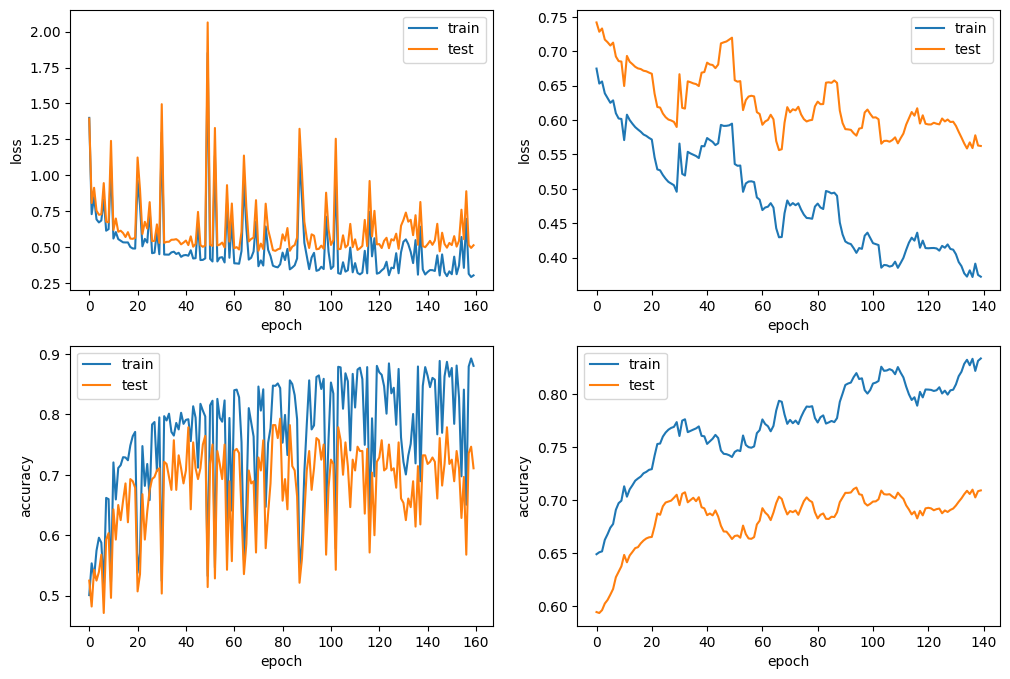

<ipython-input-18-a39901d32a36>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


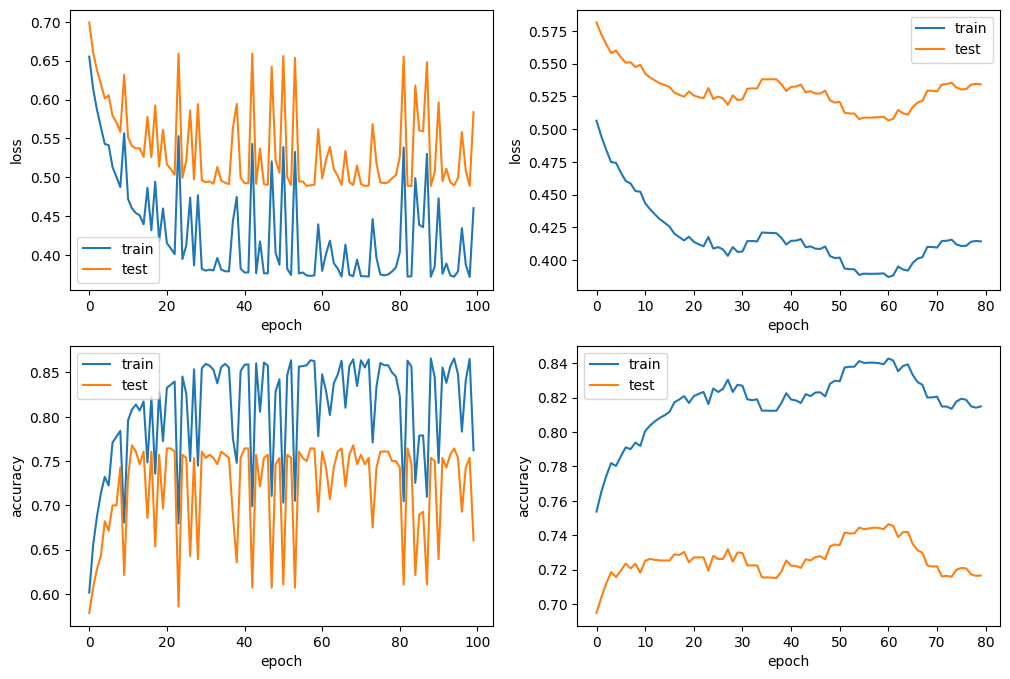

In [ ]:

individual_loss_rec = loss_rec
individual_accuracy_rec = accuracy_rec
individual_loss_smooth = smoothing(loss_rec, smoothingRadius)
individual_accuracy_smooth = smoothing(accuracy_rec, smoothingRadius)

import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.title('First training Training')
plt.subplot(221)
handles = plt.plot(population_loss_rec)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(222)
handles = plt.plot(population_loss_smooth)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(223)
handles = plt.plot(population_accuracy_rec)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(224)
handles = plt.plot(population_accuracy_smooth)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.show()

plt.figure(figsize=(12,8))
plt.title('Classifier re-training Training')
plt.subplot(221)
handles = plt.plot(individual_loss_rec)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(222)
handles = plt.plot(individual_loss_smooth)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(223)
handles = plt.plot(individual_accuracy_rec)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(224)
handles = plt.plot(individual_accuracy_smooth)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.show()




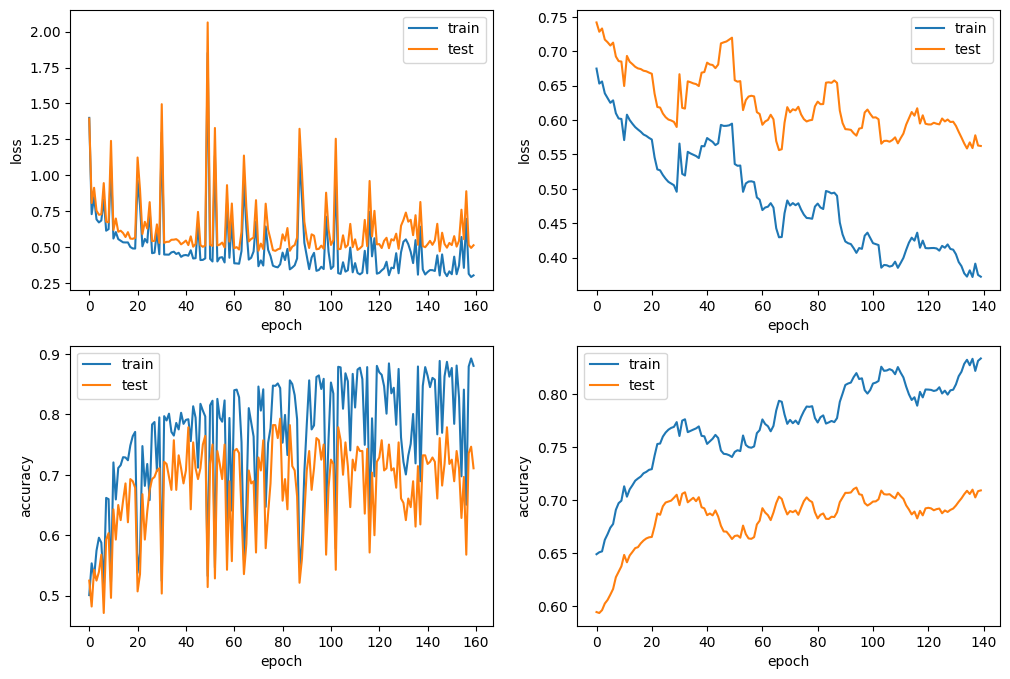

In [ ]:



plt.figure(figsize=(12,8))
plt.subplot(221)
handles = plt.plot(population_loss_rec)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(222)
handles = plt.plot(population_loss_smooth)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(223)
handles = plt.plot(population_accuracy_rec)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.subplot(224)
handles = plt.plot(population_accuracy_smooth)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(handles, ['train', 'test'])

plt.show()